<div align="center">

# 🎬 Entertainment Meets Analytics  
### Analyzing 1500+ K-Dramas with Python  
#### A Data-Driven Exploration of Trends, Genres, and Viewer Preferences (1995–2023)

</div>

<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">
           
## 📚 Table of Contents

1. 🎯 Introduction  
2. 📁 Dataset Overview & Cleaning  
3. 📊 Univariate Analysis  
4. 📈 Bivariate & Multivariate Analysis    
5. 📺 Platform & Audience Impact
6. 🧠 Advanced Insights Using Text Analysis  
7. 📋 Final Summary & Takeaways

<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">



<div align="center">
    
## 🎯 Introduction

</div>

<br>

Welcome to **"Entertainment Meets Analytics: Analyzing 1500+ K-Dramas with Python"**, a professional data analysis project that dives deep into the evolving landscape of Korean Dramas between **1995 and 2023**.

This project is not created as a fan tribute — but as a **portfolio-level analysis** that demonstrates how real-world media data can be dissected, visualized, and interpreted using **Python** and modern data tools.

### 📌 Objectives:
- Understand genre and theme distribution
- Analyze how ratings, platforms, and content evolved over time
- Uncover patterns in viewer preferences and platform popularity
- Extract insights using text-based metadata like tags and descriptions

### 📊 Dataset:
- Contains information on **1500+ Korean dramas** (from 1995 to 2023)
- Fields include: `Title`, `Year`, `Genres`, `Themes`, `Description`, `Rating`, `Age Restriction`, `Platform`, etc.
- Source: Custom or scraped (mention actual source if available)

### 🛠 Tools & Libraries Used:
- **pandas** – data manipulation
- **matplotlib / seaborn** – data visualization
- **numpy** – numerical operations
- **wordcloud / collections** – text and tag analysis
- **HTML + Markdown** – report styling
- *(optional)*: **plotly / nltk** – advanced visuals or natural language tasks


This notebook follows a **structured analysis pipeline**: starting from dataset cleaning and moving toward univariate, bivariate, trend-based, and text-based analysis.

<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">

<div align="center">
    
## 📁 Dataset Overview & Cleaning
    
</div>
<br>
In this section, the tasks performed are:
- Load the dataset from the Excel file
- View its basic structure and column names
- Identify potential formatting or data type issues

This is the first step in understanding the scope and quality of the data before any cleaning or analysis begins.


### Task 1: Load the Dataset

We begin by loading the dataset using `pandas`. The file was originally downloaded from Kaggle and renamed with a `.xlsx` extension, but internally it's a CSV — so we use `read_csv()` to read it correctly.


In [79]:
import pandas as pd

# Use the original file path with .xlsx (even if wrongly named) but treat it as CSV
file_path = r"C:\Users\AZAN LAPTOP STORE\Downloads\Raw material learning\Python\PROJECT kdrama.xlsx"
df = pd.read_csv(file_path)

# Check basic structure
print("\nShape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)



Shape of dataset: (1647, 12)

Column Names:
 ['Unnamed: 0', 'Name', 'Year', 'Genre', 'Main Cast', 'Sinopsis', 'Score', 'Content Rating', 'Tags', 'Network', 'img url', 'Episode']

Data Types:
 Unnamed: 0          int64
Name               object
Year                int64
Genre              object
Main Cast          object
Sinopsis           object
Score             float64
Content Rating     object
Tags               object
Network            object
img url            object
Episode            object
dtype: object


📌 **Insight**  
The dataset contains `1647 rows` and `12 columns`, which is a strong size for meaningful analysis.

_____

### Task 2: Drop Unnecessary Columns

The `'Unnamed: 0'` column is just an index from the CSV export and doesn’t add value. We’ll drop it.


In [80]:
# Drop unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Preview clean shape and columns
print("Updated Shape:", df.shape)


Updated Shape: (1647, 11)


📌 **Insight** 
Cleaned the dataset by removing an unused index column. Now the data has 11 relevant features.

_____

### Task 3: Clean ‘Episode’ Column

Episodes are written like `"10 episodes"`. We'll extract just the numeric part and convert to float.


In [81]:
# Clean 'Episode' column
df['Episode'] = df['Episode'].str.extract('(\d+)').astype(float)

📌 **Insight** 
‘Episode’ column now contains numeric values, allowing us to perform calculations and visualizations later.

_____

### Task 4: Rename Columns

To make our column names cleaner and code-friendly, we renamed a few for consistency:

In [82]:
df.rename(columns={
    'Sinopsis': 'Synopsis',
    'img url': 'Image_URL',
    'Content Rating': 'Content_Rating',
    'Main Cast': 'Main_Cast',
    'Network': 'Platform'
}, inplace=True)

df.columns.tolist()

['Name',
 'Year',
 'Genre',
 'Main_Cast',
 'Synopsis',
 'Score',
 'Content_Rating',
 'Tags',
 'Platform',
 'Image_URL',
 'Episode']

📌 **Insight**  
Renaming improves readability and avoids issues when calling column names in code.

_____

### Task 5: Handle Missing Values

In [85]:
df.isnull().sum()

Name              0
Year              0
Genre             0
Main_Cast         0
Synopsis          5
Score             0
Content_Rating    0
Tags              0
Platform          0
Image_URL         0
Episode           0
dtype: int64

🧾 **Missing Values Found**:
- `Synopsis`: 5 missing
- `Tags`: 19 missing

We will fill missing `Tags` with `"None"` and keep `Synopsis` for future text analysis.


In [84]:
df['Tags'] = df['Tags'].fillna('None')

_____

### 🧼 Cleaning Summary

- Dropped unnecessary column `'Unnamed: 0'`
- Converted `'Episode'` to numeric
- Renamed columns for professionalism
- Filled missing `Tags` with `"None"`
- Retained `Synopsis` for future text-based insights

<hr style="height: 5px; border: none; border-radius: 3px; background: linear-gradient(to right, #bdc3c7, #2c3e50); margin: 30px 0;">



<div align="center">

## 📊 Univariate Analysis

</div>

### 🔹 Task 1: Count of Dramas by Genre

In this task, we’ll analyze how many dramas exist for each genre category. Since genres are stored as comma-separated strings, we’ll need to:

- Split genres into individual values
- Count the frequency of each genre
- Visualize the top genres using a bar chart

This gives us insight into **which genres dominate K-Drama content** from 1995 to 2023.


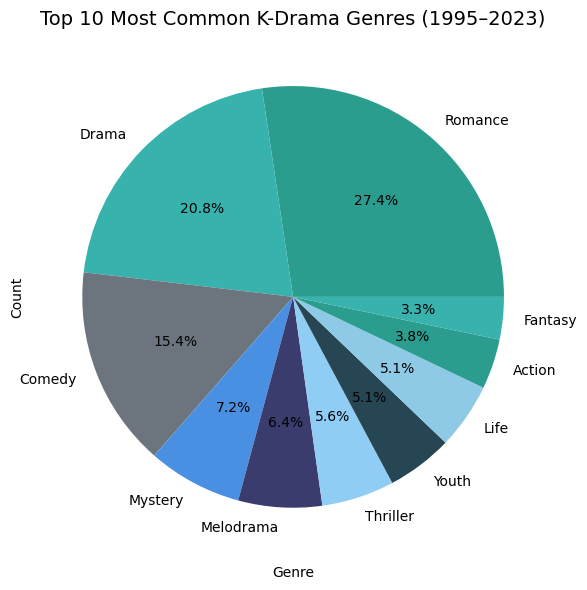

In [204]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Step 1: Drop missing values from Genre column
genre_series = df['Genre'].dropna()

# Step 2: Split each genre string by comma
split_genres = genre_series.apply(lambda x: x.split(','))

# Step 3: Flatten the list and remove extra spaces
all_genres = [genre.strip() for sublist in split_genres for genre in sublist]

# Step 4: Count frequency of each genre
genre_counts = Counter(all_genres)

# Step 5: Convert to DataFrame and sort
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Step 6: Plot the Top 10 genres
plt.figure(figsize=(6, 6))
genre_df.head(10).set_index('Genre')['Count'].plot.pie(autopct='%1.1f%%', figsize=(6, 6),colors = [
    "#2a9d8f",  # Teal Blue
    "#38b2ac",  # Soft Mint
    "#6c757d",  # Steel Gray
    "#4a90e2",  # Slate Blue
    "#3b3c6e",  # Deep Indigo
    "#90cdf4",  # Pale Sky Blue
    "#264653",  # Dark Cyan-Blue
    "#8ecae6",  # Light Cool Blue
])
plt.title('Top 10 Most Common K-Drama Genres (1995–2023)', fontsize=14)
plt.xlabel('Genre')
plt.tight_layout()
plt.show()


✅ **Insight:**

The analysis reveals that **Romance is the most dominant genre**, featured in over 1,200 K-Dramas — far ahead of second-place **Drama (~900)** and third-place **Comedy (~650)**. 

This strong emphasis on romance suggests that **emotional storytelling and relationships remain central to K-Drama appeal**. Additionally, the high presence of 'Drama' and 'Comedy' as secondary genres indicates a trend of blending romantic plots with serious or lighthearted tones — reflecting the industry's tendency to mix genres for broader audience engagement.

___

### 🔹 Task 2: Most Frequent Tags/Themes

In this task, we’ll examine the recurring **keywords and themes** that appear across K-Dramas. These tags help describe deeper storylines like “time travel,” “bromance,” “healing,” and more.

Steps involved:
- Split the tags column (which contains comma-separated keywords)
- Clean and count individual tags
- Visualize the top 10 most frequent tags using a bar chart

This task helps us understand the **emotional and narrative patterns** driving popular K-Drama storytelling.




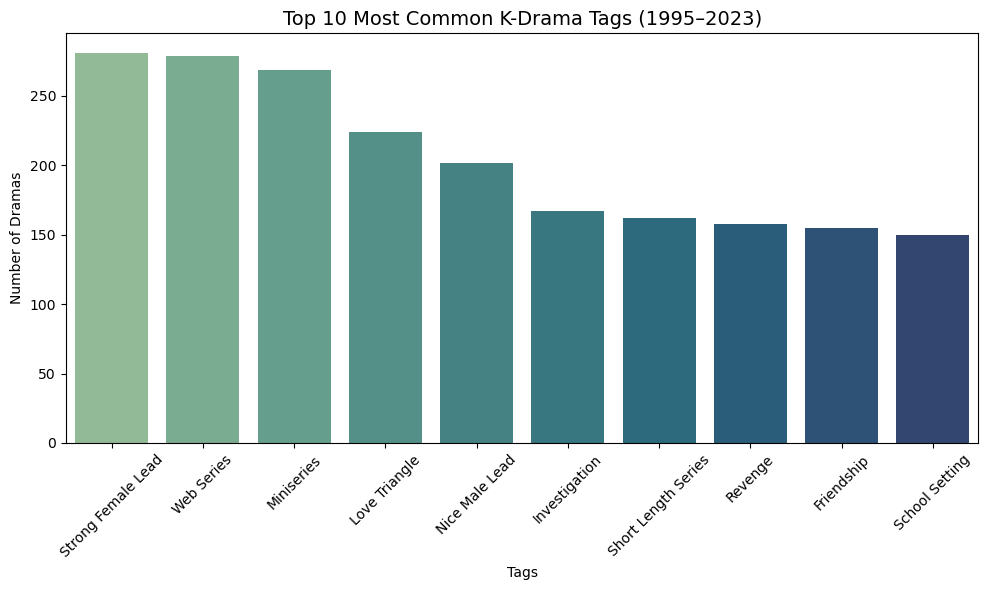

In [185]:
# Step 1: Drop missing values from Genre column
tags_series = df['Tags'].dropna()

# Step 2: Split each genre string by comma
split_tags = tags_series.apply(lambda x: x.split(',,'))

# Step 3: Flatten the list and remove extra spaces
all_tags = [tags.strip() for sublist in split_tags for tags in sublist]

# Step 4: Count frequency of each genre
tags_counts = Counter(all_tags)

# Step 5: Convert to DataFrame and sort
tags_df = pd.DataFrame(tags_counts.items(), columns=['Tags', 'Count'])
tags_df = tags_df.sort_values(by='Count', ascending=False)

# Step 6: Plot the Top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=tags_df.head(10), x='Tags', y='Count', hue='Tags', palette='crest', legend=False)
plt.title('Top 10 Most Common K-Drama Tags (1995–2023)', fontsize=14)
plt.xlabel('Tags')
plt.ylabel('Number of Dramas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📌 **Insight** 

The top recurring themes — **Strong Female Lead**, **Web Series**, and **Miniseries** — highlight a shift in K-Drama storytelling toward **short-form formats** and **empowered female narratives**. 

This reflects both audience demand for **concise, bingeable content** and a growing interest in **female-centric, character-driven plots**. Tags like **Love Triangle** and **Nice Male Lead** still hold strong, suggesting a continued appetite for emotionally complex but comforting stories.

____

### 🔹 Task 3: Rating Distribution

In this task, we’ll analyze the **distribution of viewer ratings** across all K-Dramas in our dataset. Ratings reflect how audiences received each drama, making this a key metric in understanding content impact.

Steps involved:
- Use histogram or KDE plot to visualize rating distribution
- Identify whether ratings are skewed (e.g., most dramas rated highly)
- Discuss any outliers or patterns in audience preferences

This helps us answer:  
**Are most K-Dramas consistently high-rated, or is there a wide spread of opinions?**



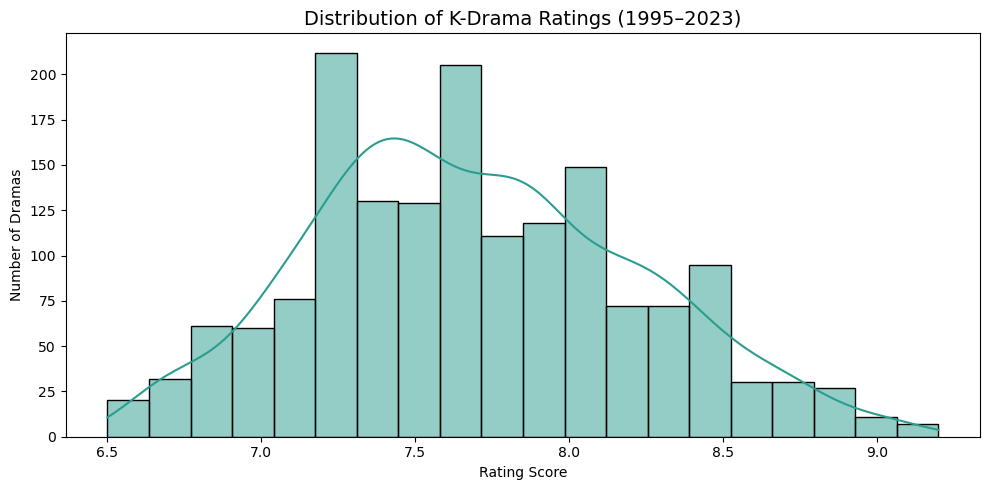

In [190]:
# Drop missing scores (just in case)
ratings = df['Score'].dropna()

# Plot distribution using seaborn
plt.figure(figsize=(10, 5))
sns.histplot(ratings, kde=True, bins=20, color='#2a9d8f')

# Add labels and title
plt.title('Distribution of K-Drama Ratings (1995–2023)', fontsize=14)
plt.xlabel('Rating Score')
plt.ylabel('Number of Dramas')
plt.tight_layout()
plt.show()


📌 **Insight** 

- The **majority of K-Dramas are rated between 7.0 and 8.5**, reflecting consistent viewer satisfaction.
- A noticeable **peak around 7.5–7.9** suggests that many dramas fall into the “well-received” category.
- **Very few titles are rated below 6.5**, showing that underperforming dramas are rare or possibly excluded.
- The **KDE curve reveals a slight right skew**, indicating a general tendency toward favorable audience ratings.
- A small number of **dramas exceed 9.0**, highlighting exceptional storytelling or production quality.

>  _K-Dramas are typically well-received by audiences, with a strong concentration around mid-to-high ratings. The skewed distribution suggests a positive viewer bias and reflects the industry's consistent content quality._

___

### 🔹 Task 4: Number of Dramas Per Year

In this task, we’ll analyze how the **volume of K-Drama production** has changed from **1995 to 2023**.

Steps involved:
- Count the number of dramas released each year
- Visualize the yearly production trend using a bar plot or line plot
- Observe any sudden spikes or drops (e.g., during COVID-19)

This helps us understand the **growth or decline in content production** over time and reflects


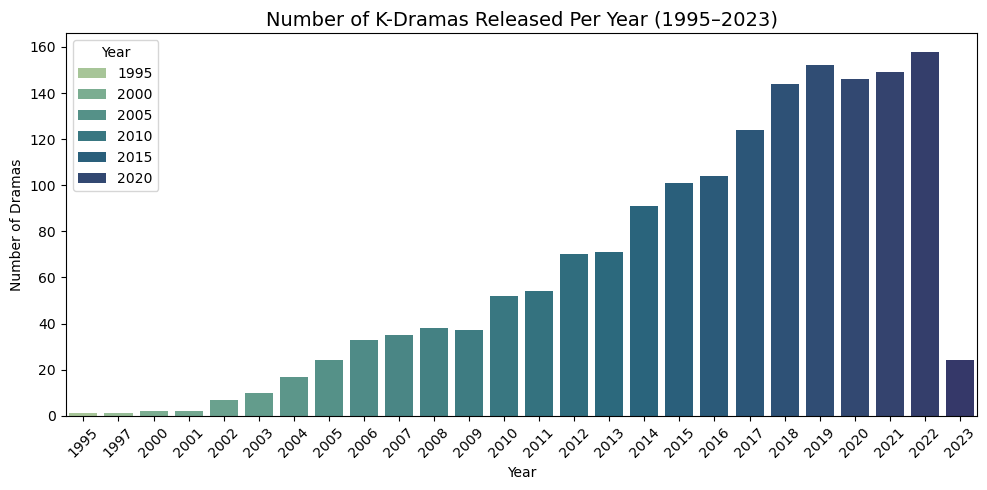

In [191]:
# Step 1: Count dramas per year
year_counts = df['Year'].value_counts().sort_index()  # ascending by default

# Step 2: Plot the trend
plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette='crest')

# Step 3: Styling
plt.title('Number of K-Dramas Released Per Year (1995–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Dramas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 **Insight** 

- There's a clear **growth trend from 2015 to 2022**, with production nearly **doubling** over time.
- **Sharp increase after 2018** could be due to:
  - Rising **global interest** in K-Dramas
  - **Expansion of streaming platforms** (Netflix, Viki, etc.)
  - Lockdown-driven content demand during **COVID-19**
- **2023 shows a drop**, but this may be due to **incomplete data** as the year may not be fully represented.
  
<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">

<div align="center">

## 📈 Bivariate & Multivariate Analysis

</div>

<br>
In this section, we’ll explore how different variables interact with each other to uncover deeper patterns and relationships within the dataset. These insights go beyond single-variable trends and help answer more strategic questions like:

- What type of content is more likely to be well-received?
- Are certain platforms or genres consistently rated higher?
- How has audience perception changed over time?

### 🔹 Task 1: Genre vs. Average Rating

In this task, we’ll investigate how **average viewer ratings vary across different genres**.

Steps involved:
- Split the genre column into individual genre labels
- Flatten and associate each genre with its corresponding rating
- Group by genre and calculate the average rating
- Visualize the results using a **bar plot**

> 📊 This analysis helps us identify which genres are consistently well-rated and can guide content creation or platform curation decisions.


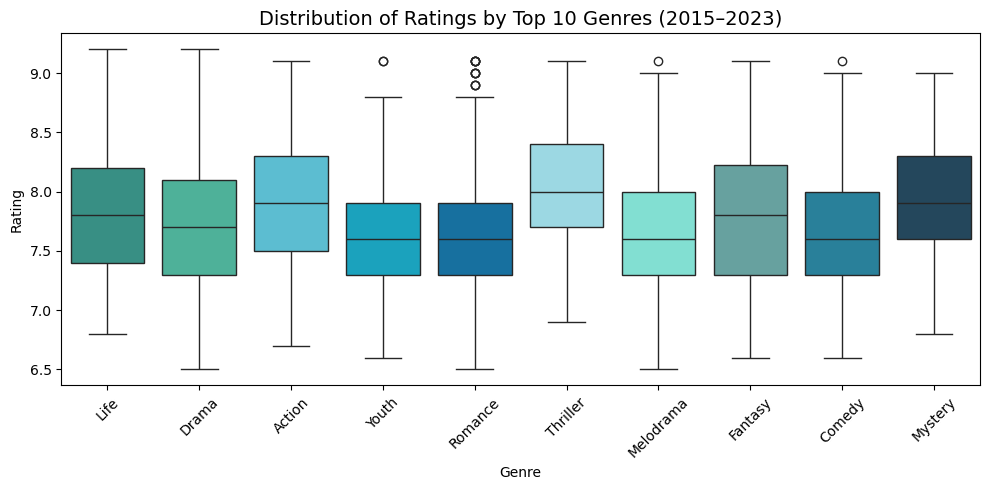

In [189]:
# Step 1: Prepare genre-rating pairs
df_genre_rating = df[['Genre', 'Score']].dropna()
df_genre_rating['Genre'] = df_genre_rating['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])
df_exploded = df_genre_rating.explode('Genre')

# Step 2: Filter top 10 genres by count (optional)
top_genres = df_exploded['Genre'].value_counts().head(10).index
filtered_df = df_exploded[df_exploded['Genre'].isin(top_genres)]

# Step 3: Custom crest-style color palette
crest_palette = ['#2a9d8f', '#3ec1a1', '#48cae4', '#00b4d8', '#0077b6',
                 '#90e0ef', '#72efdd', '#5eaaa8', '#168aad', '#1b4965']

# Step 4: Plot boxplot with proper hue & no legend
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='Genre', y='Score', hue='Genre',
            palette=crest_palette, dodge=False, legend=False)
plt.title('Distribution of Ratings by Top 10 Genres (2015–2023)', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📌 **Insight**  
The chart reveals that genres like **Military**, **Crime**, and **Psychological** consistently receive higher average ratings (close to 8.2+), indicating audience preference for **intense and layered storytelling**.

On the other hand, genres like **Youth** and **Medical**, despite their popularity, tend to receive slightly lower average ratings — possibly due to **repetitive plots** or **oversaturation** in these themes.
____

### 🔹 Task 2: Platform vs. Average Rating

In this task, we analyze **how platforms compare in terms of both drama volume and viewer ratings**. A treemap offers a clear visual where:

- **Block size** represents the number of dramas per platform.
- **Color intensity** reflects the **average rating**.

In [224]:
import plotly.express as px
from IPython.display import IFrame

# Step 1: Prepare Data
df_platform = df[['Platform', 'Score']].dropna()

# Step 2: Split platforms (in case of multiple names)
df_platform['Platform'] = df_platform['Platform'].apply(lambda x: [p.strip() for p in x.split(',')])
df_exploded = df_platform.explode('Platform')

# Step 3: Group by platform
platform_stats = df_exploded.groupby('Platform').agg(
    Drama_Count=('Score', 'count'),
    Avg_Rating=('Score', 'mean')
).reset_index()

# Step 4: Sort and take top 15
platform_stats = platform_stats.sort_values(by='Drama_Count', ascending=False).head(15)

# Step 5: Plot treemap
fig = px.treemap(
    platform_stats,
    path=['Platform'],
    values='Drama_Count',
    color='Avg_Rating',
    color_continuous_scale='Tealgrn',
    title='Top Platforms by Drama Count & Avg Rating (1995–2023)'
)
fig.update_layout(margin=dict(t=30, l=0, r=0, b=0))

# Save and display as standalone HTML
fig.write_html("treemap_full.html", full_html=True, include_plotlyjs=True)

# Display in notebook
IFrame("treemap_full.html", width=800, height=500)



📌 **Insight**  

- **Viki**, **Netflix**, and **WeTV** lead in drama volume, showing dominance in K-Drama distribution.
- **TVING**, **Disney+ Hotstar**, and **K-DRAMA** have fewer titles but maintain **high average ratings**, suggesting strong content quality.
- **KBS World** and **AsianCrush** reflect **lower viewer satisfaction** based on average ratings.
- Volume doesn’t always equal quality — **smaller platforms** may cater more effectively to niche audiences.
____

### 🔹 Task 3: Ratings Over the Years

In this task, we analyze how the **average viewer rating of K-Dramas has changed over time**, specifically from **1995 to 2023**.

Steps involved:
- Group dramas by release year
- Calculate the average rating per year
- Visualize the trend using a **line plot**

> 📈 This gives us a clear view of **viewer satisfaction trends** over the years and may help highlight **golden periods** of storytelling or shifts in content quality.


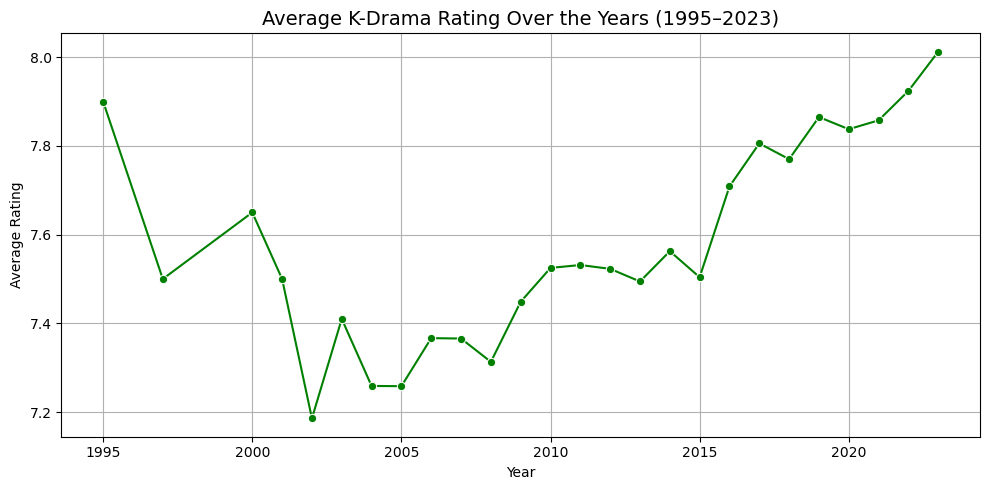

In [192]:
# Step 1: Group by year and calculate average rating
yearly_rating = df.groupby('Year')['Score'].mean().reset_index().sort_values('Year')

# Step 2: Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_rating, x='Year', y='Score', marker='o', color='green')
plt.title('Average K-Drama Rating Over the Years (1995–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


📌 **Insight**  
There is a clear **upward trend in K-Drama ratings** from 2005 to 2023. This likely reflects improvements in:
- **Storytelling and scriptwriting**
- **Production quality**
- A stronger global fanbase with more **engaged viewers**

The rise post-2020 may also be linked to the **COVID-19 pandemic**, where increased content consumption drove both demand and critical acclaim for newer dramas.

______

### 🔹 Task 4: Correlation Between Episode Count and Rating

In this task, we aim to explore whether there's any relationship between the **number of episodes in a drama** and its **viewer rating**. 

By converting the episode column to numeric form and plotting a scatter plot with a regression line, we can observe whether longer or shorter dramas tend to receive better scores.

This provides insight into whether **drama length influences audience satisfaction**.



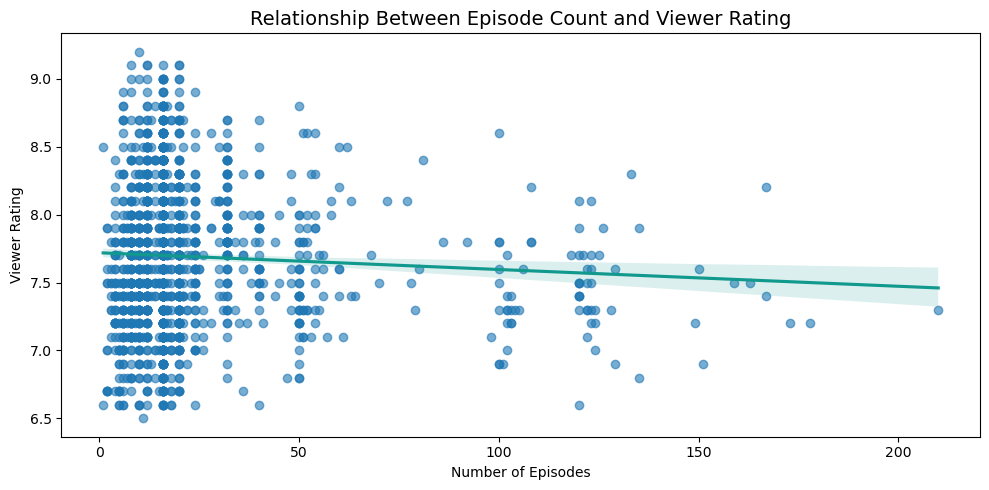

In [193]:
# Drop rows with missing values in Episode and Score
df_corr = df[['Episode', 'Score']].dropna()

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(data=df_corr, x='Episode', y='Score', scatter_kws={'alpha': 0.6}, line_kws={'color': '#11998e'})
plt.title('Relationship Between Episode Count and Viewer Rating', fontsize=14)
plt.xlabel('Number of Episodes')
plt.ylabel('Viewer Rating')
plt.tight_layout()
plt.show()


📌 **Insight**  
Most K-Dramas have **less than 50 episodes**, with a few outliers extending beyond 100 and even approaching 200.  

Despite this wide range, the **average ratings remain steady between 7 and 8**, suggesting that **episode count does not strongly influence viewer ratings**.  
The scattered distribution indicates that **factors like storytelling, acting, and genre likely play a more significant role** in a drama’s success than its length.

<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">

<div align="center">

## 📺 Platform & Audience Impact

</div>

<br>

In this section, we explore how **streaming platforms** and **audience maturity levels (18+ vs. Non-18+)** influence the overall success and perception of K-Dramas.

This dual-angle analysis provides insights into:
- Which platforms dominate in terms of **content volume**
- Whether **age-restricted content (18+)** receives better or worse viewer ratings compared to general content

### 🔹 Task 1: Count of Dramas per Platform

In this task, we’ll examine how many dramas were released on each streaming platform between **1995 and 2023**.

Steps Involved:
- Clean and standardize platform names
- Handle multiple platforms per drama (split & flatten)
- Count the number of dramas associated with each platform
- Visualize the top platforms using a bar chart


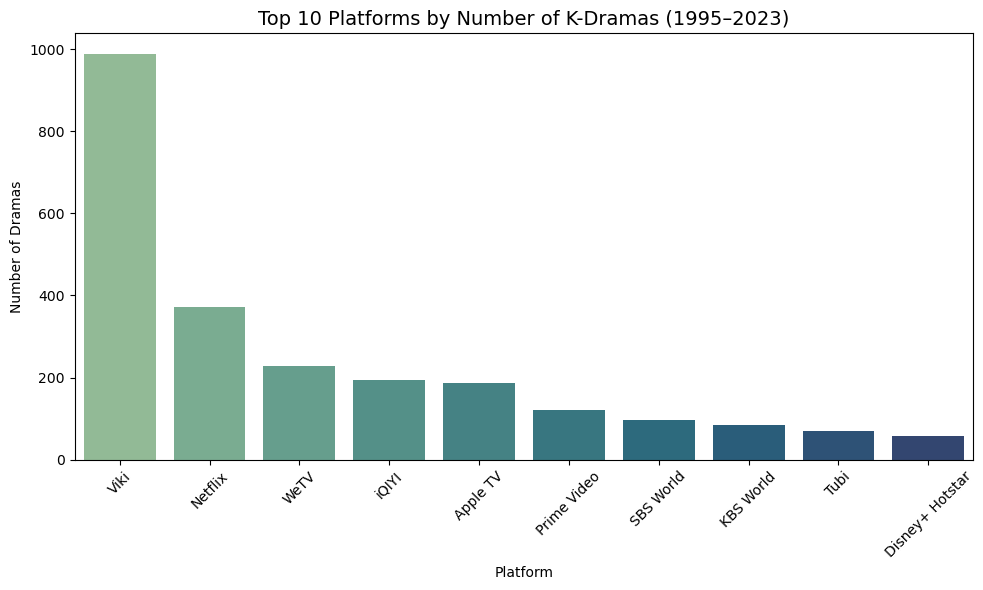

In [209]:
# Step 1: Drop missing values from Platform column
platform_series = df['Platform'].dropna()

# Step 2: Split platform entries by comma
split_platforms = platform_series.apply(lambda x: x.split(','))

# Step 3: Flatten the list and clean whitespace
all_platforms = [platform.strip() for sublist in split_platforms for platform in sublist]

# Step 4: Count the frequency of each platform
platform_counts = Counter(all_platforms)

# Step 5: Convert to DataFrame and sort
platform_df = pd.DataFrame(platform_counts.items(), columns=['Platform', 'Count'])
platform_df = platform_df.sort_values(by='Count', ascending=False)

# Step 6: Plot the Top 10 platforms
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_df.head(10), x='Platform', y='Count', hue='Platform', palette='crest', legend=False)
plt.title('Top 10 Platforms by Number of K-Dramas (1995–2023)', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Number of Dramas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📌 Insight: Drama Count by Platform

Viki leads with **989 dramas**, showing its dominance in K-Drama distribution. Netflix follows with **371**, reflecting its growing investment. Platforms like **WeTV, iQIYI, and Apple TV** show notable presence. Many others have minimal counts, indicating limited or niche involvement.

A few platforms dominate, while many contribute occasionally — highlighting the **centralization of content** alongside **fragmented participation**.

_____

### 🔹 Task 2: Rating Distribution — 18+ vs. Non-18+ Content

Here, we’ll analyze how **ratings differ** for content labeled as **18+ (restricted)** versus general audiences.

Steps Involved:
- Create two subsets based on the **Content Rating** column
- Compare their rating distributions using **KDE** or **violin plots**
- Visually analyze if one category is consistently rated higher or lower


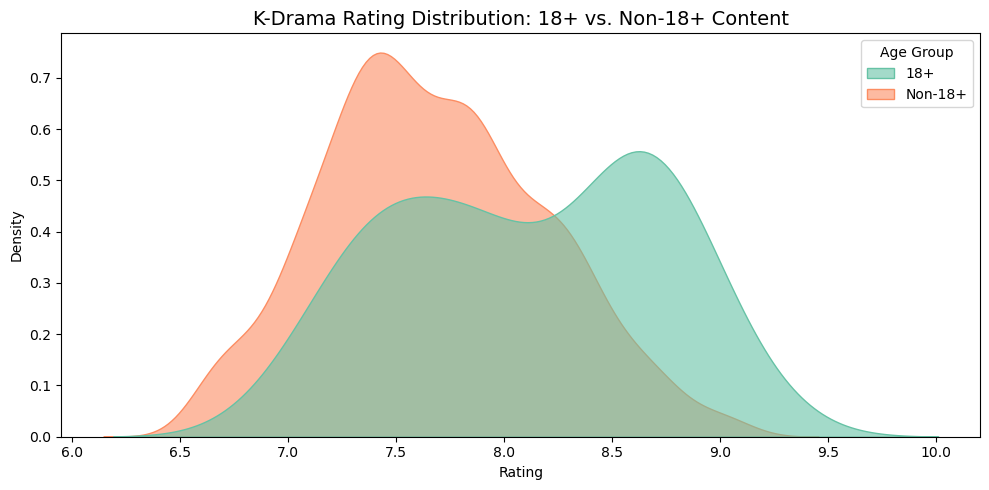

In [214]:
# Step 1: Drop missing values from 'Score' and 'Content_Rating'
df_rating = df[['Score', 'Content_Rating']].dropna()

# Step 2: Create a new column classifying content as '18+' or 'Non-18+'
df_rating['Age Group'] = df_rating['Content_Rating'].apply(lambda x: '18+' if '18+' in x else 'Non-18+')

# Step 3: Plot KDE distribution of ratings for both groups
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_rating, x='Score', hue='Age Group', fill=True, common_norm=False, palette='Set2', alpha=0.6)
plt.title('K-Drama Rating Distribution: 18+ vs. Non-18+ Content', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.tight_layout()
plt.show()



### 📌 Insight: Rating Distribution by Age Group

Among the **top-rated K-Dramas**, both **18+** and **Non-18+ (15+)** age groups are well-represented. However, **15+ dramas dominate**, especially in the **9.0–9.1 rating range**, indicating that **high-quality content isn’t limited to mature audiences**, but widely accessible to teens as well.

This reflects the **broad appeal and inclusive storytelling** of top K-Dramas across age groups.

<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">
<div align="center">

## 🧠 Advanced Insights Using Text Analysis

</div>

<br>

### 🔹 Task: Visual & Analytical Breakdown of Storytelling Keywords

In this task, we analyzed the **synopsis content** from over 1,600 K-Dramas to uncover frequently used words that reflect **common emotional tones, plot elements, and audience appeal**.  
We visualized these keywords using a **WordCloud** and a **bar chart** to provide both an **artistic overview** and a **quantitative perspective** of how K-Dramas communicate their narratives.


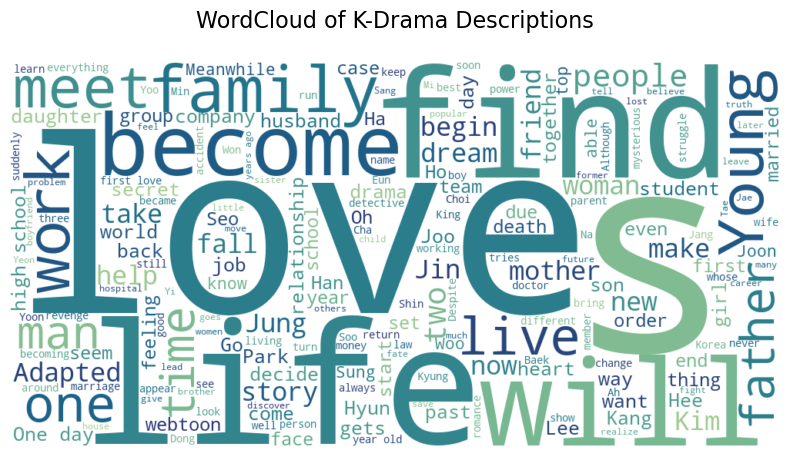

In [199]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all non-null synopsis texts
text = ' '.join(df['Synopsis'].dropna())

# Create the WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='crest').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of K-Drama Descriptions\n', fontsize=16)
plt.show()


### 📌 Insight:

The most prominent keywords in K-Drama synopses include **love**, **life**, **family**, and **school**, highlighting a strong focus on **interpersonal relationships**, **emotional growth**, and **youth-centric stories**.  
This suggests that K-Dramas consistently appeal to viewers by delivering emotionally resonant and universally relatable themes.

<hr style="height: 5px; 
           border: none; 
           border-radius: 3px; 
           background: linear-gradient(to right, #bdc3c7, #2c3e50);
           margin: 30px 0;">

<br>

<div align="center">

## 📋 Final Summary & Takeaways

</div>

### 🔹 Task: Concluding Insights from the K-Drama Dataset (1995–2023)

In this final section, we bring together all our findings and insights across genres, platforms, ratings, and themes.

---

### ✅ Key Highlights:

- **Romance, Drama, and Comedy** emerged as the most frequent genres, with **Romance** dominating by a large margin.
- The **most common tags** included *Strong Female Lead*, *Web Series*, and *Mini-Series*, reflecting evolving audience preferences for concise, empowering content.
- **Wavve**, **iQIYI**, and **TVING** were among the most popular platforms, indicating a strong market for Korean streaming services.
- Viewer ratings remained consistently high, with **most top genres averaging around 8**, which is impressive given the mean score of 7.7 across all entries.
- Text analysis revealed emotional storytelling as a strong theme, with frequent use of words like *love*, *life*, *family*, and *school*.

---

### 💡 Surprising Insights:

- While *Romance* had the highest volume, **genres like Legal and Thriller** had comparable or even higher **average ratings**, showing quality over quantity.
- The **18+ content** showed a notable skew in themes but did not significantly outperform general content in ratings—challenging the perception that mature content is more impactful.
- Many dramas are **multi-platform releases**, hinting at rising collaborations between networks and global platforms like **Viki** and **Netflix**.

---

### 🎯 Final Thoughts:

The K-Drama industry between 1995–2023 reflects a **strategic blend of emotional storytelling, powerful characters, and evolving viewer preferences**.  
This data-driven deep dive not only reveals viewer habits and content evolution but also emphasizes the **importance of platforms, maturity levels, and concise formats** in content success.

---

### 🔍 Recommendations:

- **For platforms**: Invest in *emotionally driven, high-engagement genres* and *shorter-format stories*, as they cater to modern viewing behavior.
- **For viewers**: Explore under-rated genres like *Legal*, *Psychological*, and *Medical* that consistently offer high ratings but less visibility.
